# **Final Project 2**
## **1. Perkenalan**

Nama Anggota Kelompok :
1. Carenina Amanda Putri / PYTN-KS12-017
2. Aurisha Lutvinda Putrian / PYTN-KS12-014
3. Muhammad Rafi Ramadhan / PYTN-KS12-002



### 1.1 Latar Belakang

Data cuaca merupakan salah satu data yang penting dalam berbagai bidang seperti pertanian, transportasi, pariwisata, dan sebagainya. Namun, data cuaca tersebut seringkali tidak terorganisir dengan baik sehingga sulit untuk dianalisis. Oleh karena itu, perlu dilakukan pengolahan data agar data cuaca tersebut dapat dimanfaatkan dengan maksimal.

Pada proyek ini, akan dilakukan pengolahan data cuaca dari dataset Weather Dataset Rattle Package yang berisi data cuaca di Australia. Data ini memiliki informasi mengenai cuaca pada hari ini dan prediksi cuaca untuk besok. Data tersebut mencakup variabel seperti suhu, kelembapan, tekanan udara, kecepatan angin, serta informasi apakah akan hujan pada hari ini dan besok.

Dalam proyek ini, akan dilakukan beberapa tahap pengolahan data, seperti pembersihan data, eksplorasi data, serta pembuatan model prediksi untuk memprediksi apakah akan hujan pada besoknya. Dengan melakukan pengolahan data ini, diharapkan data cuaca yang tidak terorganisir dapat diolah menjadi informasi yang lebih berguna dan dapat membantu dalam berbagai bidang.

## 1.2 Objektif
- Mampu memahami konsep regression dengan##
- Mampu mempersiapkan data untuk digunakan dalam model##
- Mampu mengimplementasikan ## untuk membuat prediksi

## **2. Import Data**
pada bagian ini menggunakan import library untuk melakukan preproceesing, visualisasi dan modelling


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics
from sklearn.datasets import load_files, load_iris
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from nltk import FreqDist, NaiveBayesClassifier
from flask import Flask, request, jsonify, render_template
%matplotlib inline
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

## **3. Data Loading**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3.1 Read Dataframe dari source CSV
Memasukkan dataframe, dataframe yang digunakan kali ini adalah dataframe **Weather AUS**, yang kemudian menampilkan data teratas

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')


## 3.2 Menampilkan 5 data teratas

In [ ]:
print("Dataset berisi {} baris dan {} kolom (atribut)".format(df.shape[0], df.shape[1]))
df.head()

Dataset berisi 145460 baris dan 23 kolom (atribut)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 3.3 Melihat data terbawah

In [ ]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


### 3.4 Melihat dimensi dari dataset

In [ ]:
df.shape

(145460, 23)

Dapat diketahui bahwa dataset yang digunakan terdiri dari 23 kolom dan 145460 baris.

### 3.5 Melihat informasi kolom, baris, dan data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Keterangan:

1.	**Date** - tanggal hari itu
2.	**Location** - lokasi, nama kota di Australia
3.	**MinTemp** - temperatur terendah hari itu dalam celcius
4.	**MaxTemp** - temperatur tertinggi hari itu dalam celcius
5.	**Rainfall** - jumlah curah hujan hari itu dalam mm
6.	**Evaporation** - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7.	**Sunshine** - jumlah jam hari itu cerah dengan cahaya matahari
8.	**WindGustDir** - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9.	**WindGustSpeed** - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10.	**WindDir9am** - arah angin jam 9 pagi
11.	**WindDir3pm** - arah angin jam 3 sore
12.	**WindSpeed9am** - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13.	**WindSpeed3pm** - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14.	**Humidity9am** - humiditas jam 9 pagi dalam persen
15.	**Humidity3pm** - humiditas jam 3 sore dalam persen
16.	**Pressure9am** - tekanan udara jam 9 pagi dalam hpa
17.	**Pressure3pm** - tekanan udara jam 3 sore dalam hpa
18.	**Cloud9am** - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19.	**Cloud3pm** - persentase langit yang tertutup awan jam 3 sore
20.	**Temp9am** - temperatur jam 9 pagi dalam celcius
21.	**Temp3pm** - temperatur jam 3 sore dalam celcius
22.	**RainToday** - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23.	**RainTomorrow** - variable yang mau di prediksi



### 3.6 Melihat Statistik Dataframe secara umum

Karena dataset ini memiliki 2 tipe data yaitu float, dan object maka statistik ditampilkan per tipe data.

#### 3.6.1 Mengecek statistik deskriptif dari masing-masing atribut yang bertipe float

In [ ]:
df.describe(include='float' )

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


#### 3.6.2 Mengecek statistik deskriptif dari masing-masing atribut yang bertipe objek

In [ ]:
df.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


### 3.7 Melihat banyaknya unique values untuk tiap atribut.

In [ ]:
for col in df.columns:
    print(col,': ', df[col].nunique())

Date :  3436
Location :  49
MinTemp :  389
MaxTemp :  505
Rainfall :  681
Evaporation :  358
Sunshine :  145
WindGustDir :  16
WindGustSpeed :  67
WindDir9am :  16
WindDir3pm :  16
WindSpeed9am :  43
WindSpeed3pm :  44
Humidity9am :  101
Humidity3pm :  101
Pressure9am :  546
Pressure3pm :  549
Cloud9am :  10
Cloud3pm :  10
Temp9am :  441
Temp3pm :  502
RainToday :  2
RainTomorrow :  2


## 4. Data Cleaning

### 4.1 Mengecek apakah terdapat duplikat value pada dataset

In [ ]:
df.duplicated().sum()

0

### 4.2 Menampilkan jumlah serta persentase dari missing value yang terdapat pada dataset

In [ ]:
mv = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
mv


,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustDir,10326,7.1 %
WindGustSpeed,10263,7.06 %
WindDir9am,10566,7.26 %


### 4.3 Drop Attribut yang memiliki persentase missing value diatas 35 persen

In [ ]:
df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],inplace=True, axis=1)

In [ ]:
df.shape

(145460, 19)

Dapat terlihat bahwa jumlah attribut yang ada berkurang dari 23 menjadi 19 buah.

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


### 4.4 Mengisi Missing Value

In [ ]:
df1=df.copy()
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


#### 4.4.1 Mengisi missing value pada attribut beripe data categorical

Ringkasan variabel kategori

- Ada variabel tanggal. Itu dilambangkan dengan kolom `Tanggal`.

- Ada 6 variabel kategori. Ini diberikan oleh `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` dan `RainTomorrow`.

- Ada dua variabel kategorikal boolean - `RainToday` dan `RainTomorrow`.

- `RainTomorrow` adalah variabel target.

In [ ]:
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for col in categorical_cols:
    df1[col] = df1[col].astype('category')

# fill missing values with backward forward filling
df1[categorical_cols] = df1[categorical_cols].fillna(method='bfill').fillna(method='ffill')

In [ ]:
df1[categorical_cols].isna().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [ ]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Dapat terlihat bahwa tidak lagi missing value pada attribut yang memiliki tipe data categorical setelah melakukan pengisian menggunakan metode backward forward filling.

#### 4.4.2 Mengisi missing value pada attribut yang memiliki tipe data numerik


Untuk mengisi data yang hilang pada fitur numerik, dapat digunakan nilai rata-rata (mean) atau nilai tengah (median). Namun, harus diingat bahwa nilai rata-rata dapat dipengaruhi oleh nilai yang sangat jauh dari mayoritas data (outlier), sedangkan nilai tengah tidak dipengaruhi oleh outlier. Oleh karena itu, jika ingin memilih untuk mengisi nilai yang hilang dengan nilai rata-rata, pastikan bahwa outlier pada fitur numerik sudah ditangani dengan benar terlebih dahulu.

In [ ]:
# Megetahui kolom yang memiliki tipe data numerik
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(num_cols)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


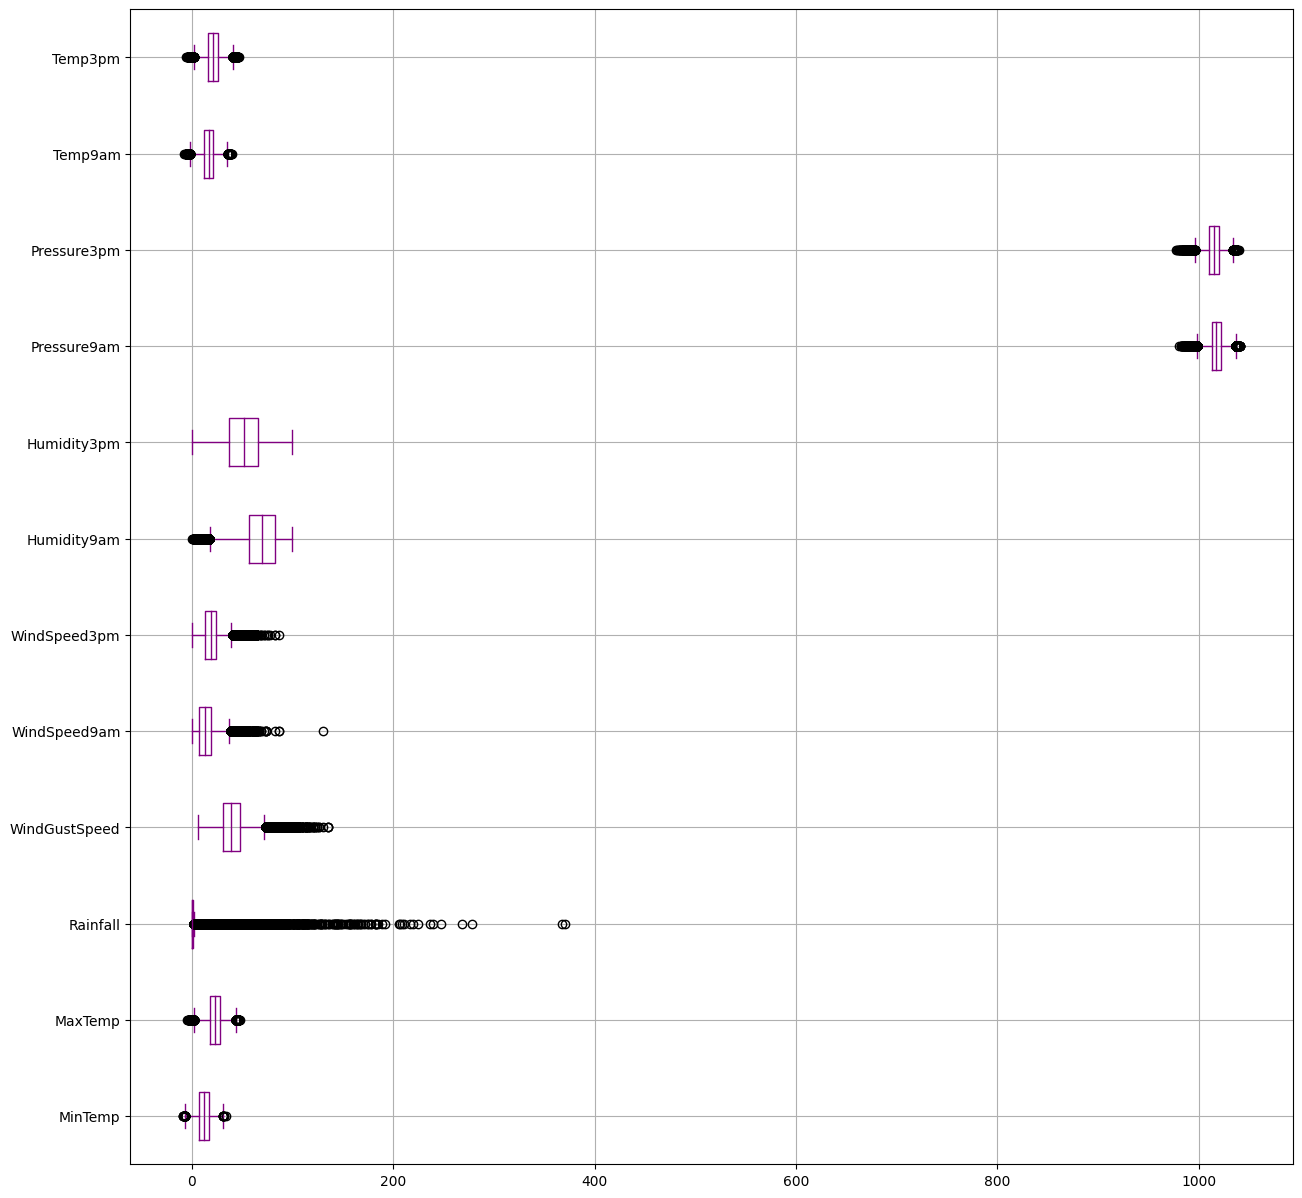

In [ ]:
# Mengisi missing values menggunakan median
plt.show()
df1[num_cols].boxplot(figsize=(15,15), vert=False, color='purple')
plt.show()

Dikarenakan masih banyak outlier sehingga kita harus menghilangkannya terlebih dahulu menggunakan metode IQR Outlier Removal.

In [ ]:
outliers_data = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for data in outliers_data:
    q1 = df1[data].quantile(0.25)
    q3 = df1[data].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df1[data]<lower_limit,data] = lower_limit
    df.loc[df1[data]>upper_limit,data] = upper_limit

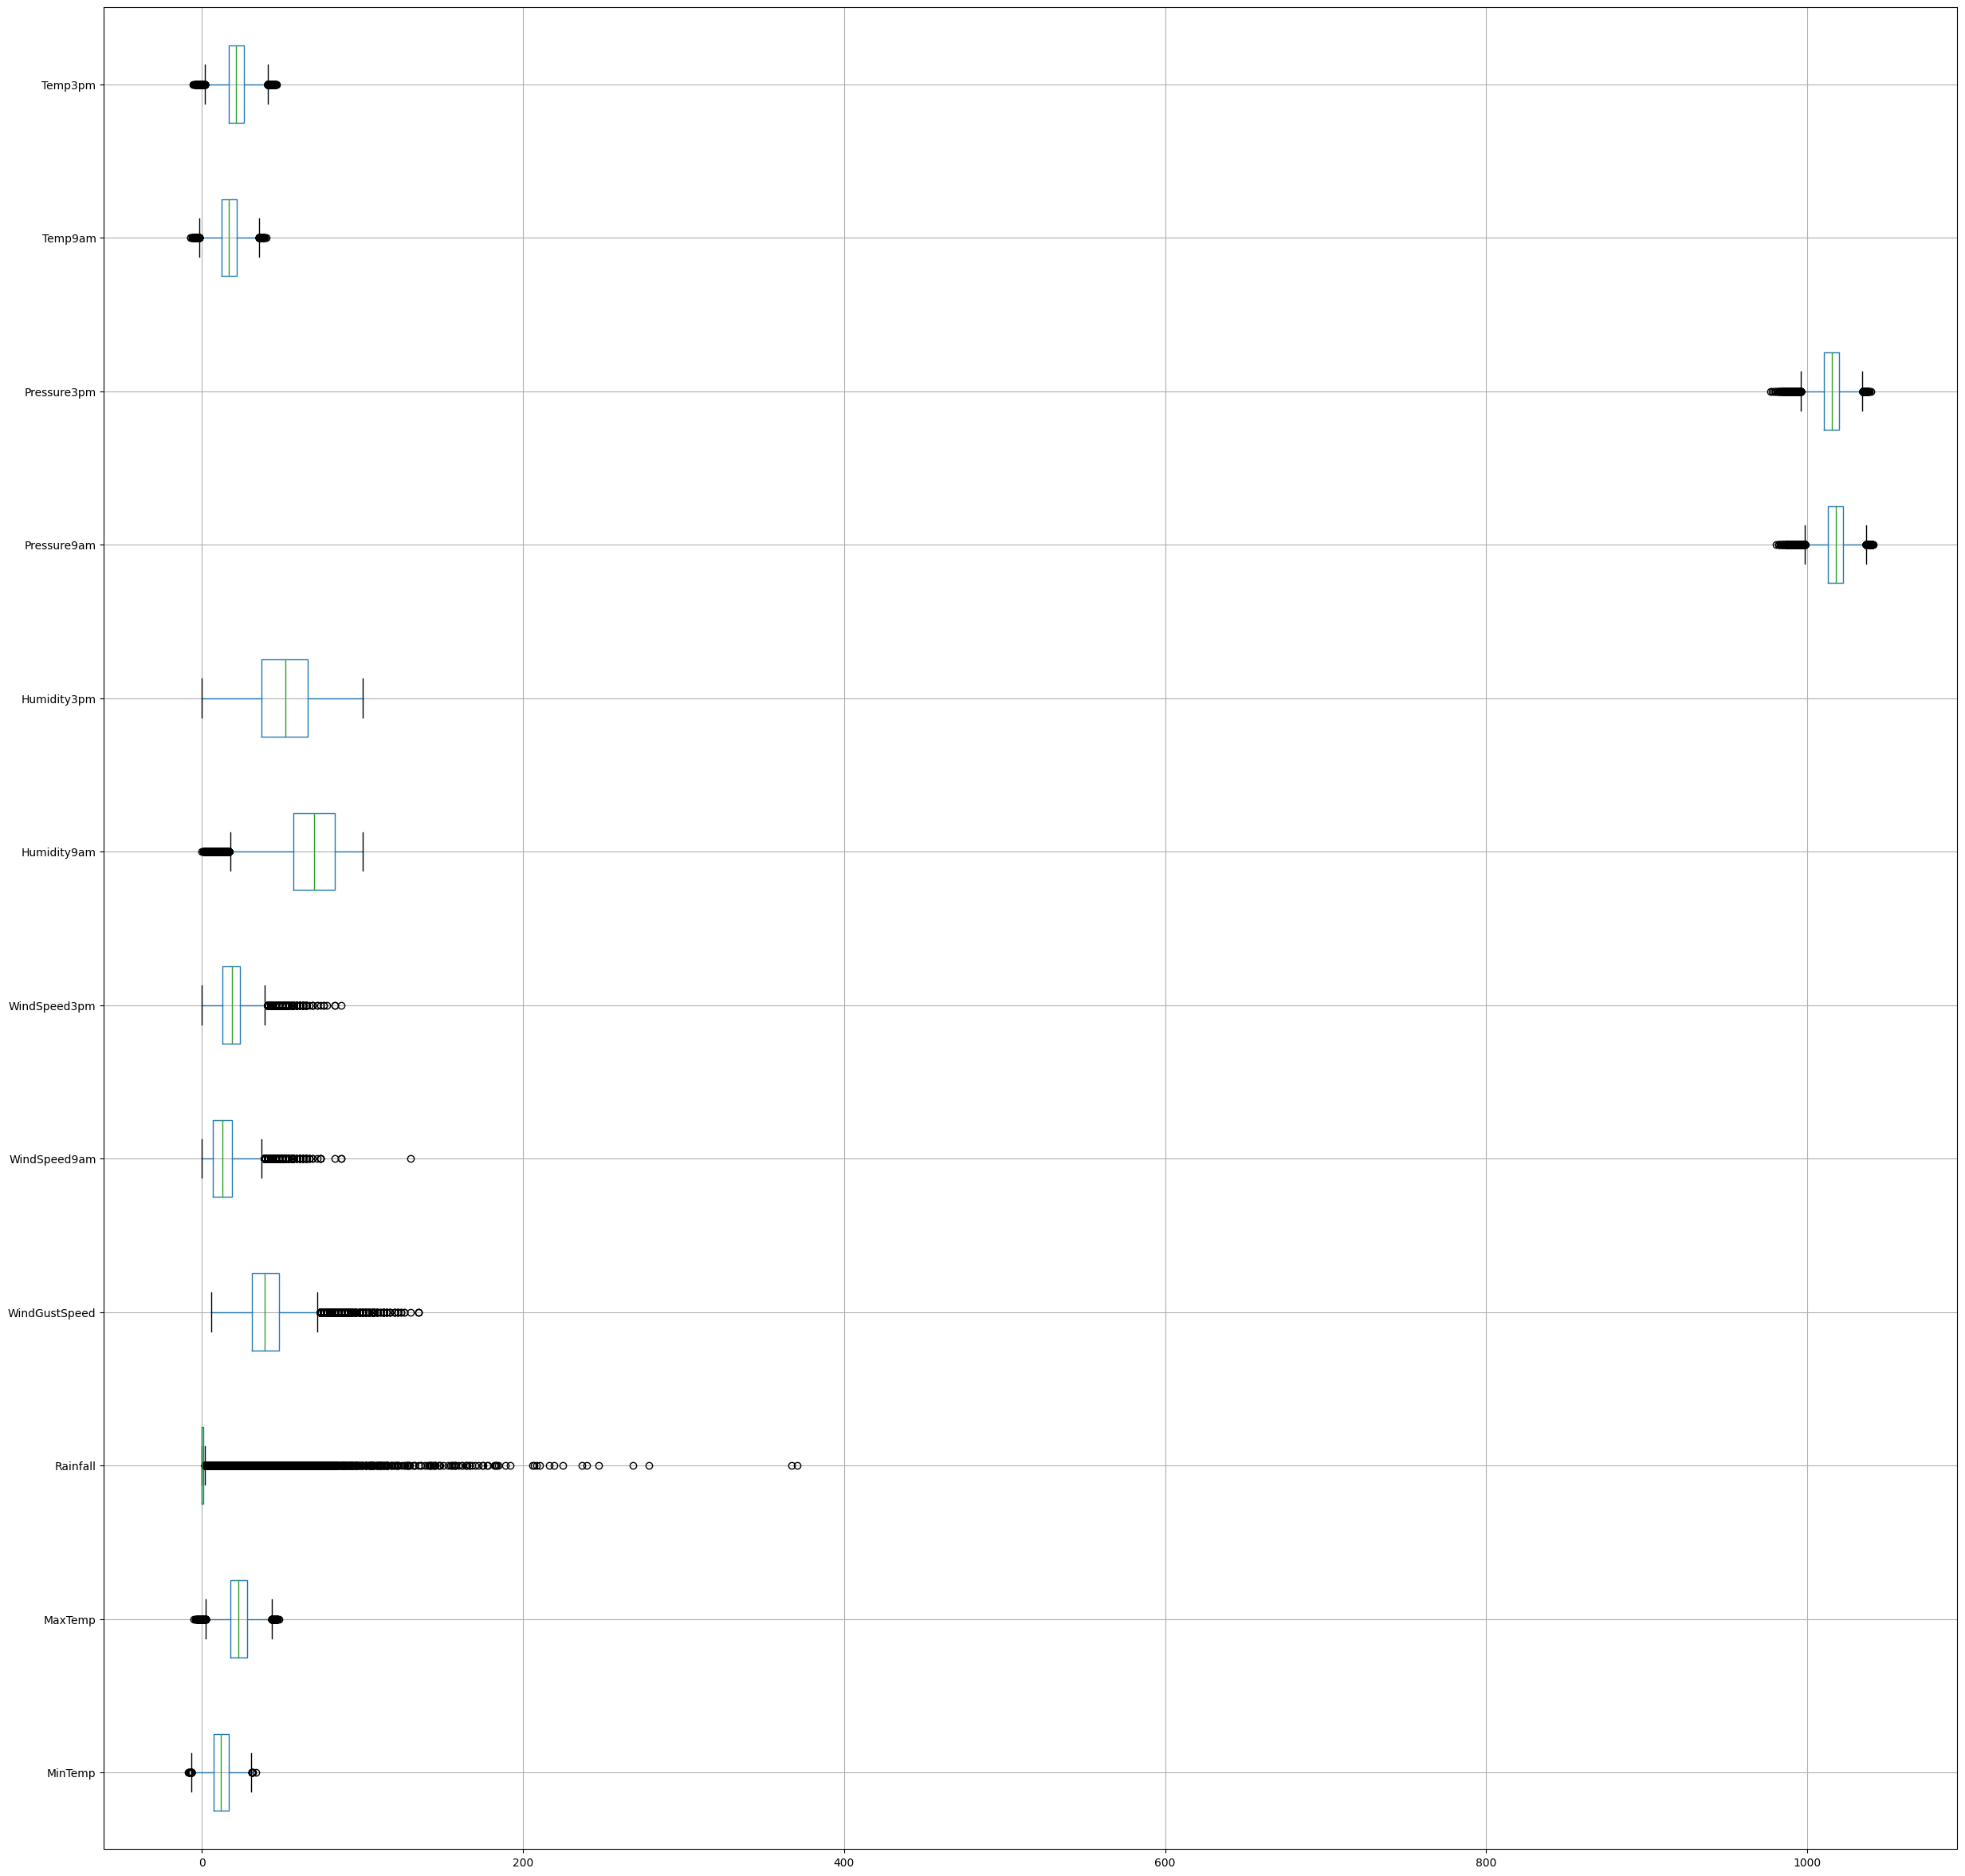

In [ ]:
df1[num_cols].boxplot(figsize=(30,30), vert=False)
plt.show()

Karena outliers telah ditangani maka kita dapat menggunakan mean untuk mengisi missing value pada data numerikal.

In [ ]:
for col in num_cols:
    if df1[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df1[col].fillna(mean_value, inplace=True)


In [ ]:
df1[num_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

Pengisian missing value untuk data numerik telah berhasil dilakukan menggunakan mean, karna pada awalnya terdapat banyak outliers maka harus dihilangkan terlebih menggunakan metode IQR Outlier Removal.

### 4.5 Mengubah kolom 'Date' menjadi tipe data datetime

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Day'] = df1['Date'].dt.day
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,5,12,2008



Mengubah kolom 'date' menjadi tipe data datetime merupakan langkah penting dalam melakukan analisis data, karena kolom tersebut menyimpan informasi tanggal dan waktu. Dengan mengubah tipe data kolom 'date' menjadi datetime, kita dapat dengan mudah memanipulasi data tanggal dan waktu untuk menjawab pertanyaan analisis yang berkaitan dengan tren, musiman, dan pola data. Selain itu, dengan tipe data datetime, kita juga dapat melakukan agregasi data berdasarkan tanggal dan waktu seperti mingguan, bulanan, dan tahunan. Hal ini akan memudahkan kita dalam melakukan pemodelan dan membuat prediksi yang akurat berdasarkan data historis yang ada.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  category      
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   WindGustDir    145460 non-null  category      
 6   WindGustSpeed  145460 non-null  float64       
 7   WindDir9am     145460 non-null  category      
 8   WindDir3pm     145460 non-null  category      
 9   WindSpeed9am   145460 non-null  float64       
 10  WindSpeed3pm   145460 non-null  float64       
 11  Humidity9am    145460 non-null  float64       
 12  Humidity3pm    145460 non-null  float64       
 13  Pressure9am    145460 non-null  float64       
 14  Pressure3pm    145460 non-null  float64       
 15  

## **5. Explorasi Data Analysis**

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

Membuat gambar (figure) dengan ukuran 18 x 12 inci menggunakan library matplotlib.pyplot (plt). Di dalam gambar tersebut, ditampilkan sebuah peta panas (heatmap) yang merepresentasikan korelasi antara variabel-variabel dalam dataframe (df_corr) dengan rotasi 90

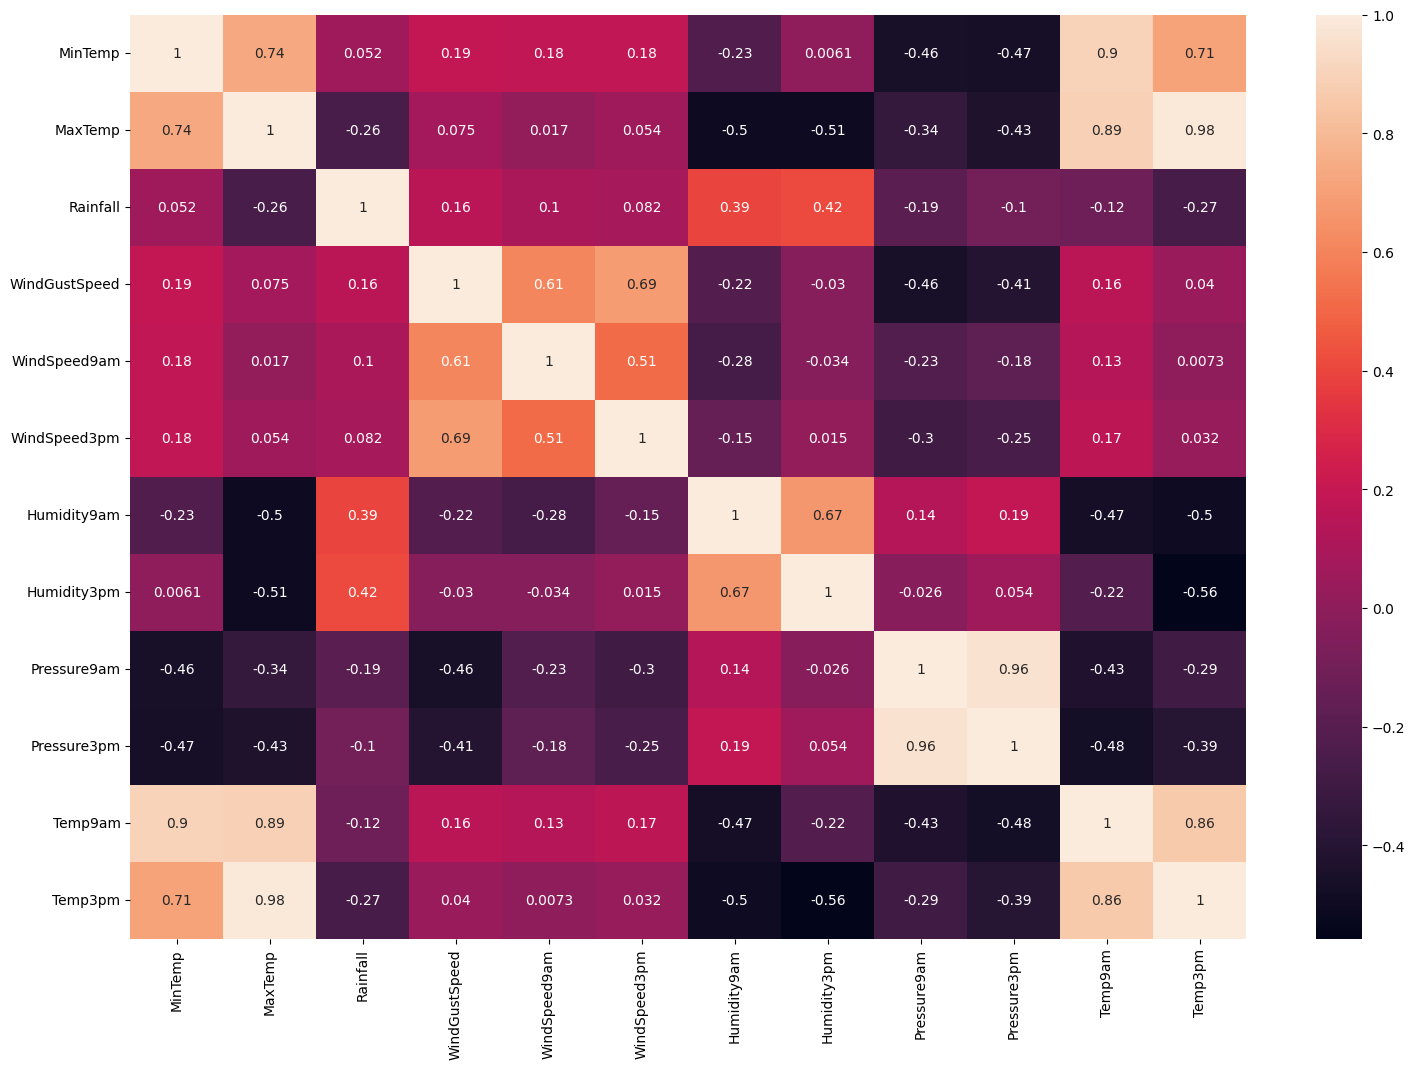

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

Feature Humidity3pm dan RainToday memiliki korelasi tinggi, sedangkan MinTemp, Evaporation, WindSpeed9am, WindSpeed3pm, dan Temp9am memiliki korelasi sangat rendah

## 5.1 Korelasi WindGustDir, WindDir9am, dan WindDir3pm dengan Target

In [ ]:
from sklearn.preprocessing import LabelEncoder

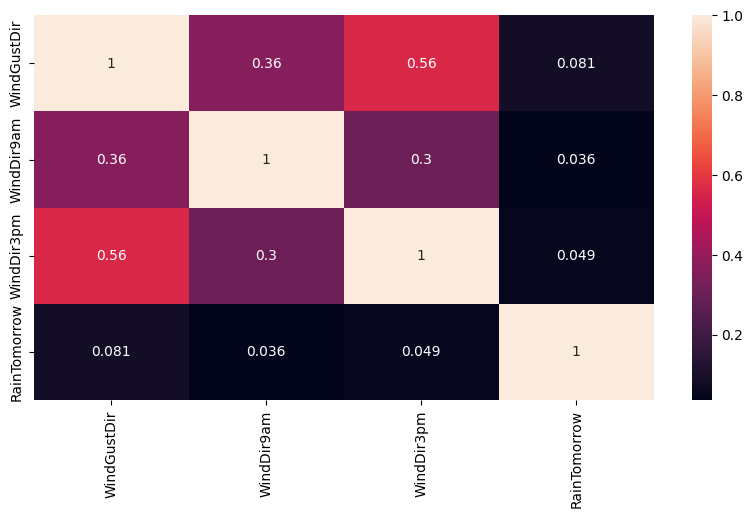

In [ ]:
dff = df.copy()
cat = ['WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']
le =  LabelEncoder()
for i in cat:
        dff[i] = le.fit_transform(dff[i])

dff = dff[['WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']]

plt.figure(figsize=(10,5))
sns.heatmap(dff.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

WindGustDir, WindDir9am, dan WindDir3pm memiliki korelasi yang lemah

## **6. Pre Processing**

## 6.1 Scaling Dataframe

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
columns = ['MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am']

In [ ]:
data = df[columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MaxTemp        144199 non-null  float64
 1   Rainfall       142199 non-null  float64
 2   WindGustSpeed  135197 non-null  float64
 3   Humidity9am    142806 non-null  float64
 4   Humidity3pm    140953 non-null  float64
 5   Pressure9am    130395 non-null  float64
dtypes: float64(6)
memory usage: 6.7 MB


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

feature scaling menggunakan StandardScaler dari library sklearn. Hal ini dilakukan agar setiap fitur pada dataset memiliki rentang nilai yang serupa, sehingga tidak ada satu fitur pun yang dominan dan mempengaruhi hasil prediksi. Dalam hal ini, setiap fitur pada dataset diubah menjadi memiliki nilai mean=0 dan standar deviasi=1. Hasilnya ditampung pada variabel scaled_features dan ditampilkan dalam bentuk dataframe pada variabel df_feat. Dapat dilihat bahwa setiap fitur pada dataset telah diubah menjadi memiliki nilai yang relatif serupa, dengan nilai mean mendekati 0 dan nilai standar deviasi mendekati 1. Hal ini akan memudahkan proses modeling dan meningkatkan akurasi prediksi.

In [ ]:
df_scaled = pd.DataFrame(data_scaled, columns=columns)

In [ ]:
df_scaled.head()

,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am
0,-0.045740,0.142249,0.320618,0.109471,-1.420435,-1.419175
1,0.264093,-0.614556,0.320618,-1.320876,-1.276175,-1.006388
2,0.348593,-0.614556,0.474680,-1.638731,-1.035742,-1.433409
3,0.672509,-0.614556,-1.219998,-1.267900,-1.708954,-0.010006
4,1.278091,0.646786,0.089526,0.692205,-0.891482,-0.977920


In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [ ]:
df.reset_index(drop=True,inplace=True)

Menambahkan 3 kolom untuk df_scaled dari sumber kolom df

In [ ]:
df_scaled.isnull().sum()

MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
dtype: int64

Melakukan pengecekan dataframe df_scaled dan dinyatakan tidak ada missing values

In [ ]:
weather_new = df_scaled

Membuat dataframe daru untuk modelling

In [ ]:
weather_new.shape

(145460, 6)

melihat ukuran dataframe untuk modelling dan terdapat 123.710 baris data dan 9 kolom

In [ ]:
weather_new.head()

,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am
0,-0.045740,0.142249,0.320618,0.109471,-1.420435,-1.419175
1,0.264093,-0.614556,0.320618,-1.320876,-1.276175,-1.006388
2,0.348593,-0.614556,0.474680,-1.638731,-1.035742,-1.433409
3,0.672509,-0.614556,-1.219998,-1.267900,-1.708954,-0.010006
4,1.278091,0.646786,0.089526,0.692205,-0.891482,-0.977920


In [ ]:
weather_new['Location']

KeyError: ignored

Melihat isi dari kolom lokasi pada dataframe weather_new

## **7.Pendefinisian Model**

## Kolom nama

In [ ]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Drop  RainToday variable

Untuk menghindari data yang rusak diberi nama variable sebagai *RainToday*

In [ ]:
df.drop(['RainToday'], axis=1, inplace=True)

### View summary of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainTomorrow   142193 non-nul


- Kita dapat melihat bahwa dataset berisi campuran variabel kategori dan numerik.

- Variabel kategori memiliki tipe data `objek`.

- Variabel numerik memiliki tipe data `float64`.

- Juga, ada beberapa nilai yang hilang dalam kumpulan data. Kami akan menjelajahinya nanti.

### View statistical properties of dataset

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.000000,130432.000000,143693.000000,141851.000000
mean,12.194186,23.224781,0.487224,39.837792,13.951313,18.574162,68.933567,51.539116,1017.670297,1015.269781,16.991728,21.686191
std,6.397741,7.100632,0.792809,12.981866,8.607783,8.532467,18.876608,20.795902,7.025447,6.976954,6.481325,6.909048
min,-6.350000,2.450000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,-1.650000,1.900000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000
max,30.850000,43.650000,2.000000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,35.550000,41.100000


- Perintah `df.describe()` di atas membantu kita untuk melihat properti statistik dari variabel numerik. Itu tidak termasuk variabel karakter.

- Jika kita ingin melihat properti statistik dari variabel karakter, kita harus menjalankan perintah berikut -

        df.jelaskan(termasuk=['objek'])

- Jika kita ingin melihat properti statistik dari semua variabel, kita harus menjalankan perintah berikut -

       df.jelaskan(termasuk='semua')

## 5. Univariate Analysis

### Explore `RainTomorrow` target variable

**Memeriksa data yang hilang**

In [ ]:
df['RainTomorrow'].isnull().sum()

3267

Terlihat data yang hilang berkisar 3267 data target dari Rain Tomorrow

**Memeriksa Data**

In [ ]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

The two unique values are `No` and `Yes`.

**Memeriksa data distribusi frekuensi**

In [ ]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

**Memeriksa Frekuensi Distribusi data berdasarkan persentase**

In [ ]:
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

Dari data yang didapat diketahui data Rain Tomorrow yang muncul

---
Ya= 21.91%

Tidak=75.83%


## Visualisasi Frekuensi distribusi data dari Rain Tomorrow

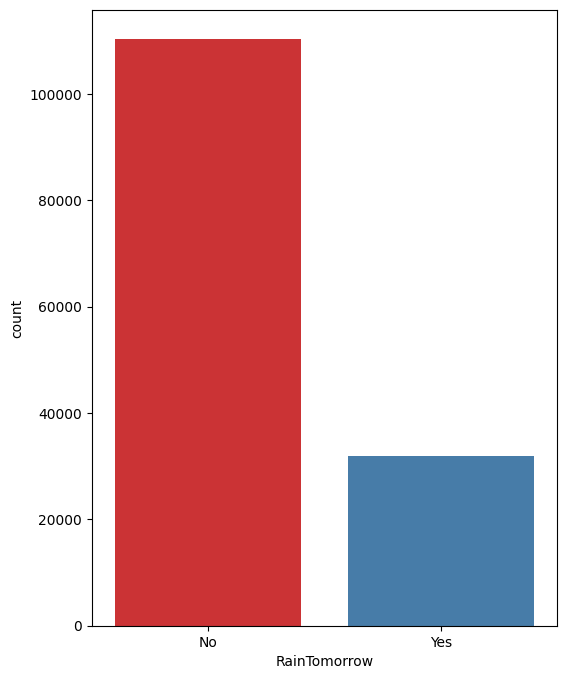

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

##**Plot Bar**

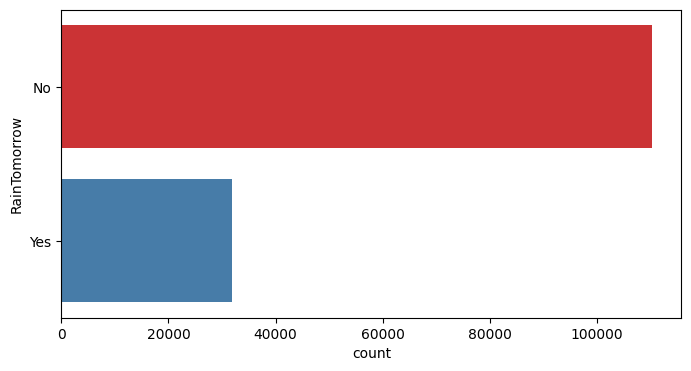

In [ ]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="RainTomorrow", data=df, palette="Set1")
plt.show()

### Temuan Analisis Univariat <a class="anchor" id="5.2"></a>


- Jumlah nilai unik dalam variabel `RainTomorrow` adalah 2.

- Dua nilai unik adalah `No` dan `Yes`.

- Dari jumlah total nilai `RainTomorrow`, `No` muncul 75,83% kali dan `Yes` muncul 21,91% kali.


In [ ]:
df3.describe()

NameError: ignored

In [ ]:
df3.describe(include="O")

NameError: ignored

Maka Data pensebaran pada atribut ini adalah atribut Today_Rain dan Tomorrow_Rain

NameError: ignored

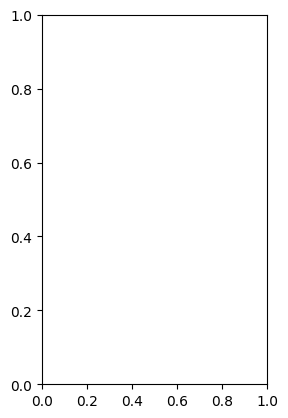

In [ ]:
%matplotlib inline
plt.subplot(1,2,1)
df3['Besok_Hujan'].value_counts().plot.bar(color='g')
plt.title('Besok Hujan')

plt.subplot(1,2,2)
df3['Hari_ini_Hujan'].value_counts().plot.bar(color='b')
plt.title('Hari ini Hujan')
plt.show()

### **6.Analisah Bivariate**

### Jenis variabel <a class="anchor" id="6.1"></a>


Pada bagian ini, kami memisahkan dataset menjadi variabel kategori dan numerik. Ada campuran variabel kategori dan numerik dalam kumpulan data. Variabel kategori memiliki tipe data objek. Variabel numerik memiliki tipe data float64.

In [ ]:
# Menemukan kategori data

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow']


In [ ]:
# melihat categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No
1,2008-12-02,Albury,WNW,NNW,WSW,No
2,2008-12-03,Albury,WSW,W,WSW,No
3,2008-12-04,Albury,NE,SE,E,No
4,2008-12-05,Albury,W,ENE,NW,No


### Ringkasan variabel kategori

- Ada variabel tanggal. Itu dilambangkan dengan kolom `Tanggal`.


- Ada 6 variabel kategori. Ini diberikan oleh `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` dan `RainTomorrow`.


- Ada dua variabel kategorikal biner - `RainToday` dan `RainTomorrow`.


- `RainTomorrow` adalah variabel target.

### Mencari masalah dengan variable kategori

In [ ]:
# melihat data yang hilang

df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainTomorrow     3267
dtype: int64

In [ ]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainTomorrow     3267
dtype: int64


Kita dapat melihat bahwa hanya ada 4 variabel kategori dalam dataset yang mengandung missing value. Ini adalah `WindGustDir`, `WindDir9am`, `WindDir3pm` dan `RainToday`.

In [ ]:
# view frequency of categorical variables

for var in categorical:

    print(df[var].value_counts())

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009

In [ ]:
# view frequency distribution of categorical variables

for var in categorical:

    print(df[var].value_counts()/np.float(len(df)))

2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: Date, Length: 3436, dtype: float64
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.020686
Nuriootpa 

#### Jumlah label: kardinalitas


Jumlah label dalam variabel kategori dikenal sebagai **kardinalitas**. Sejumlah besar label dalam variabel dikenal sebagai **kardinalitas tinggi**. Kardinalitas tinggi dapat menimbulkan beberapa masalah serius dalam model pembelajaran mesin. Jadi, kami akan memeriksa kardinalitas tinggi.

In [ ]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainTomorrow  contains  3  labels


Dari data terlihat bahwa ada variabel `DATE` yang perlu diproses terlebih dahulu. Saya akan melakukan preprocessing di bagian berikut.

Semua variabel lainnya mengandung jumlah variabel yang relatif lebih kecil.

In [ ]:
df['Date'].dtypes

dtype('O')

In [ ]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [ ]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [ ]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  135197 non-null  float64       
 7   WindDir9am     134894 non-null  object        
 8   WindDir3pm     141232 non-null  object        
 9   WindSpeed9am   143693 non-null  float64       
 10  WindSpeed3pm   142398 non-null  float64       
 11  Humidity9am    142806 non-null  float64       
 12  Humidity3pm    140953 non-null  float64       
 13  Pressure9am    130395 non-null  float64       
 14  Pressure3pm    130432 non-null  float64       
 15  

Kita dapat melihat bahwa ada tiga kolom tambahan yang dibuat dari variabel `Date`. Sekarang, saya akan menghapus variabel `Date` asli dari dataset.

In [ ]:

df.drop('Date', axis=1, inplace = True)

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,2008,12,5


#### Explore Categorical Variables one by one


Now, I will explore the categorical variables one by one.

In [ ]:


categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow']


We can see that there are 6 categorical variables in the dataset. The `Date` variable has been removed. First, I will check missing values in categorical variables.

In [ ]:
df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainTomorrow     3267
dtype: int64

### Explore `Location` variable

In [ ]:
print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [ ]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
df.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


# One Hot Encoding of Location variable


In [ ]:
pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore `WindGustDir` variable

In [ ]:
print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [ ]:
df['WindGustDir'].unique()


array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [ ]:
df.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

# One Hot Encoding of WindGustDir variable

In [ ]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

Terlihat dari data diatas bahwa 10326 data hilang di 'WindGustDir'

### Explore `WindDir9am` variable

In [ ]:
print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [ ]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [ ]:
df['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

# One Hot Encoding of WindDir9am variable

In [ ]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

Terlihat dari data diatas bahwa 10566 data hilang di 'WindDir9am'

### Explore `WindDir3pm` variable

In [ ]:
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [ ]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [ ]:
df['WindDir3pm'].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

# One Hot Encoding of WindDir3pm variable

In [ ]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

Terlihat dari data diatas bahwa 4228 data hilang di 'WindDir3pm'

### Explore Numerical Variables <a class="anchor" id="6.5"></a>

In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 15 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [ ]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,2008,12,5


### Summary of numerical variables
- Ada 16 variabel numerik.


- Ini diberikan oleh `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, ` Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` dan `Temp3pm`.


- Semua variabel numerik bertipe sama.

### Explore problems within numerical variables <a class="anchor" id="6.7"></a>


Now, explore the numerical variables.


In [ ]:
# check missing values in numerical variables
df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

### Outliers in numerical variables

In [ ]:
# summary statistics in numerical variables

print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
count  143975.0  144199.0  142199.0       135197.0      143693.0   
mean       12.0      23.0       0.0           40.0          14.0   
std         6.0       7.0       1.0           13.0           9.0   
min        -6.0       2.0       0.0            6.0           0.0   
25%         8.0      18.0       0.0           31.0           7.0   
50%        12.0      23.0       0.0           39.0          13.0   
75%        17.0      28.0       1.0           48.0          19.0   
max        31.0      44.0       2.0           74.0          37.0   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count      142398.0     142806.0     140953.0     130395.0     130432.0   
mean           19.0         69.0         52.0       1018.0       1015.0   
std             9.0         19.0         21.0          7.0          7.0   
min             0.0         18.0          0.0        999.0        996.0   
25%         

KeyError: ignored

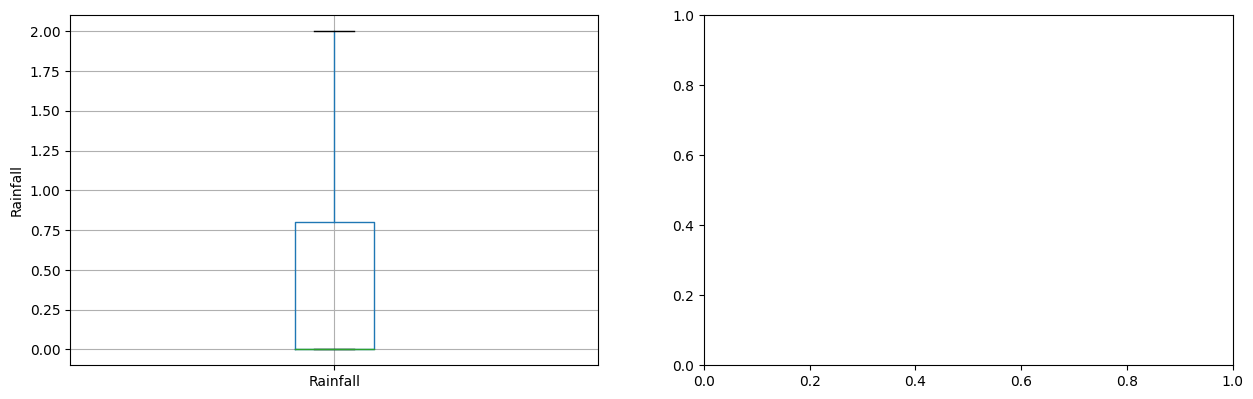

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

### Checking the distribution of variables

AttributeError: ignored

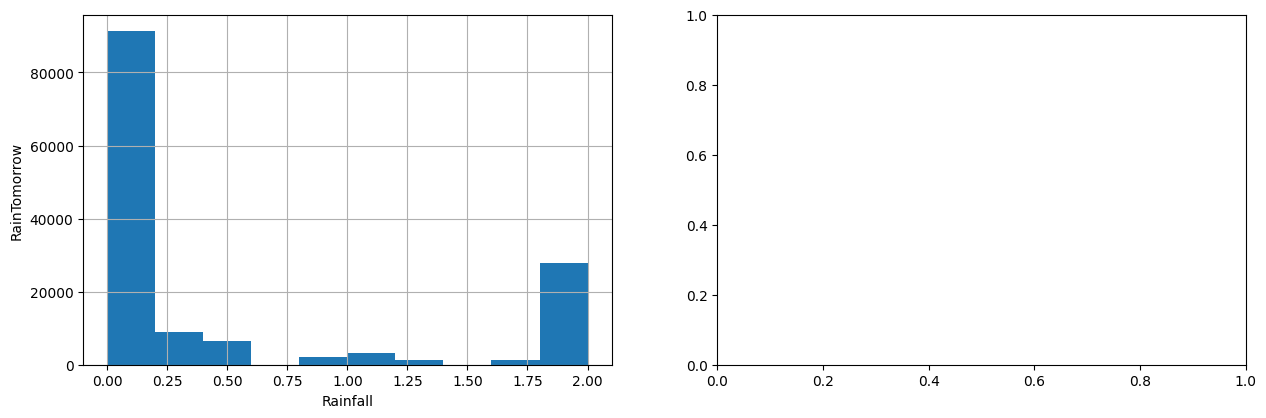

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [ ]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [ ]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


AttributeError: ignored

In [ ]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed9am outliers are values < -29.0 or > 55.0


In [ ]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -20.0 or > 57.0
